<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Introduction to Machine Learning</h1><h2>Universal Workflow of Machine Learning - Demo 1</h2><h3>The Data School</h3></th>
    </tr>
</table>

## Objectives
##### After completing this practical demo, you should be able to:
1. [Perform Data Preparation on a Dataset](#p1)
2. [Train a Simple Classification Machine Learning Model](#p2)
3. [Fine Tune Hyperparameters of a Simple Classification Model](#p3)
4. [Evaluate a Classification Machine Learning Model](#p4)
5. [Save a Trained Model for Future Use](#p5)

## 1. Perform Data Preparation on a Dataset <a id='p1' />
### 1.1 Importing data from CSV file into a Pandas DataFrame

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

In [2]:
# Import dataset
df = pd.read_csv('titanic.csv')

In [3]:
# View first 5 records of the DataFrame
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   DeleteMe  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [4]:
# View last 10 records of the DataFrame
df.tail(10)

Survived  Pclass                                      Name  Gender   Age  \
881         0       3                        Markun, Mr. Johann    male  33.0   
882         0       3              Dahlberg, Miss. Gerda Ulrika  female  22.0   
883         0       2             Banfield, Mr. Frederick James    male  28.0   
884         0       3                    Sutehall, Mr. Henry Jr    male  25.0   
885         0       3      Rice, Mrs. William (Margaret Norton)  female  39.0   
886         0       2                     Montvila, Rev. Juozas    male  27.0   
887         1       1              Graham, Miss. Margaret Edith  female  19.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889         1       1                     Behr, Mr. Karl Howell    male  26.0   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch            Ticket     Fare Cabin Embarked  DeleteMe  
881      0      0            349257   7.8958   NaN        S       NaN  
882      0      0              7552  10.5167   NaN        S       NaN  
883      0      0  C.A./SOTON 34068  10.5000   NaN        S       NaN  
884      0      0   SOTON/OQ 392076   7.0500   NaN        S       NaN  
885      0      5            382652  29.1250   NaN        Q       NaN  
886      0      0            211536  13.0000   NaN        S       NaN  
887      0      0            112053  30.0000   B42        S       NaN  
888      1      2        W./C. 6607  23.4500   NaN        S       NaN  
889      0      0            111369  30.0000  C148        C       NaN  
890      0      0            370376   7.7500   NaN        Q       NaN

### 1.2. Examine the State of the Data

In [5]:
# View number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Gender      891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
DeleteMe    0 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for null values in each column
df.isnull().any()

Survived    False
Pclass      False
Name        False
Gender      False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
DeleteMe     True
dtype: bool

In [7]:
# Check the total number of null values in the DataFrame
df.isnull().values.sum()

1757

In [8]:
# Check the number of null values in one column
df['Age'].isnull().values.sum()

177

### 1.3 Remove or Replace Null Values

In [9]:
# It is a good practice to create a copy of the dataframe
df_bkup = df.copy() 

In [10]:
# Drop columns containing mostly null values
df = df.drop(['Cabin','DeleteMe'], axis=1) # axis values: 0 to drop rows, 1 to drop columns. Default is 0.
df.isnull().any()

Survived    False
Pclass      False
Name        False
Gender      False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool

In [11]:
df.tail()

Survived  Pclass                                      Name  Gender   Age  \
886         0       2                     Montvila, Rev. Juozas    male  27.0   
887         1       1              Graham, Miss. Margaret Edith  female  19.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889         1       1                     Behr, Mr. Karl Howell    male  26.0   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch      Ticket   Fare Embarked  
886      0      0      211536  13.00        S  
887      0      0      112053  30.00        S  
888      1      2  W./C. 6607  23.45        S  
889      0      0      111369  30.00        C  
890      0      0      370376   7.75        Q

In [12]:
# Replace all null values in the Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype(int)
df['Age'].isnull().any()

False

In [13]:
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket     Fare Embarked  
0    male   22      1      0         A/5 21171   7.2500        S  
1  female   38      1      0          PC 17599  71.2833        C  
2  female   26      0      0  STON/O2. 3101282   7.9250        S  
3  female   35      1      0            113803  53.1000        S  
4    male   35      0      0            373450   8.0500        S

In [14]:
# Identify rows with Embarked == NaN
df[df['Embarked'].isnull() == True]

Survived  Pclass                                       Name  Gender  Age  \
61          1       1                        Icard, Miss. Amelie  female   38   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   62   

     SibSp  Parch  Ticket  Fare Embarked  
61       0      0  113572  80.0      NaN  
829      0      0  113572  80.0      NaN

In [15]:
# Identify mode of Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Replace all null values in the Embarked column with the mode value
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().any()

False

In [17]:
# Drop rows containing null values
# df = df.dropna()
# df.isnull().any()

In [18]:
# View number of items and data type of each column after dropping null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Gender      891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 66.3+ KB


### 1.4 Create New Features

In [19]:
# Create new feature FamilySize as a combination of SibSp and Parch
df['FamilySize'] = df['SibSp'].add(df['Parch']) + 1
df.head(10)

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

   Gender  Age  SibSp  Parch            Ticket     Fare Embarked  FamilySize  
0    male   22      1      0         A/5 21171   7.2500        S           2  
1  female   38      1      0          PC 17599  71.2833        C           2  
2  female   26      0      0  STON/O2. 3101282   7.9250        S           1  
3  female   35      1      0            113803  53.1000        S           2  
4    male   35      0      0            373450   8.0500        S           1  
5    male   29      0      0            330877   8.4583        Q           1  
6    male   54      0      0             17463  51.8625        S           1  
7    male    2      3      1            349909  21.0750        S           5  
8  female   27      0      2            347742  11.1333        S           3  
9  female   14      1      0            237736  30.0708        C           2

In [20]:
# Create new feature IsAlone from FamilySize
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket     Fare Embarked  FamilySize  \
0    male   22      1      0         A/5 21171   7.2500        S           2   
1  female   38      1      0          PC 17599  71.2833        C           2   
2  female   26      0      0  STON/O2. 3101282   7.9250        S           1   
3  female   35      1      0            113803  53.1000        S           2   
4    male   35      0      0            373450   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

### 1.5 Encode Categorial Data

In [21]:
# Encode gender of passengers
df['Gender'] = df['Gender'].map( {'female': 0, 'male': 1} ).astype(int)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket     Fare Embarked  FamilySize  \
0       1   22      1      0         A/5 21171   7.2500        S           2   
1       0   38      1      0          PC 17599  71.2833        C           2   
2       0   26      0      0  STON/O2. 3101282   7.9250        S           1   
3       0   35      1      0            113803  53.1000        S           2   
4       1   35      0      0            373450   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

In [22]:
# Encode embarked location
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket     Fare  Embarked  FamilySize  \
0       1   22      1      0         A/5 21171   7.2500         0           2   
1       0   38      1      0          PC 17599  71.2833         1           2   
2       0   26      0      0  STON/O2. 3101282   7.9250         0           1   
3       0   35      1      0            113803  53.1000         0           2   
4       1   35      0      0            373450   8.0500         0           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1

In [23]:
# Create a backup of original Fare column
df['Fare_Raw'] = df['Fare'].copy()

# Bin / Group Fare values into pre-specified categories
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket  Fare  Embarked  FamilySize  \
0       1   22      1      0         A/5 21171     0         0           2   
1       0   38      1      0          PC 17599     3         1           2   
2       0   26      0      0  STON/O2. 3101282     1         0           1   
3       0   35      1      0            113803     3         0           2   
4       1   35      0      0            373450     1         0           1   

   IsAlone  Fare_Raw  
0        0    7.2500  
1        0   71.2833  
2        1    7.9250  
3        0   53.1000  
4        1    8.0500

In [24]:
# Create a backup of original Fare column
df['Age_Raw'] = df['Age'].copy()

# Bin / Group Age values into pre-specified categories
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

   Gender  Age  SibSp  Parch            Ticket  Fare  Embarked  FamilySize  \
0       1    1      1      0         A/5 21171     0         0           2   
1       0    2      1      0          PC 17599     3         1           2   
2       0    1      0      0  STON/O2. 3101282     1         0           1   
3       0    2      1      0            113803     3         0           2   
4       1    2      0      0            373450     1         0           1   

   IsAlone  Fare_Raw  Age_Raw  
0        0    7.2500       22  
1        0   71.2833       38  
2        1    7.9250       26  
3        0   53.1000       35  
4        1    8.0500       35

In [25]:
# Sort columns in alphabetical order
df = df.reindex(sorted(df.columns), axis=1)
df.head()

Age  Age_Raw  Embarked  FamilySize  Fare  Fare_Raw  Gender  IsAlone  \
0    1       22         0           2     0    7.2500       1        0   
1    2       38         1           2     3   71.2833       0        0   
2    1       26         0           1     1    7.9250       0        1   
3    2       35         0           2     3   53.1000       0        0   
4    2       35         0           1     1    8.0500       1        1   

                                                Name  Parch  Pclass  SibSp  \
0                            Braund, Mr. Owen Harris      0       3      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1      1   
2                             Heikkinen, Miss. Laina      0       3      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1      1   
4                           Allen, Mr. William Henry      0       3      0   

   Survived            Ticket  
0         0         A/5 21171  
1         1          PC 17599  
2         1  STON/O2. 3101282  
3         1            113803  
4         0            373450

### 1.6 Basic Statistical Analysis

In [26]:
# View five-number summary of numeric variables
df.describe()

Age     Age_Raw    Embarked  FamilySize        Fare    Fare_Raw  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     1.288440   29.544332    0.361392    1.904602    1.505051   32.204208   
std      0.812038   13.013778    0.635673    1.613459    1.118148   49.693429   
min      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
25%      1.000000   22.000000    0.000000    1.000000    0.500000    7.910400   
50%      1.000000   29.000000    0.000000    1.000000    2.000000   14.454200   
75%      2.000000   35.000000    1.000000    2.000000    2.000000   31.000000   
max      4.000000   80.000000    2.000000   11.000000    3.000000  512.329200   

           Gender     IsAlone       Parch      Pclass       SibSp    Survived  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.647587    0.602694    0.381594    2.308642    0.523008    0.383838  
std      0.477990    0.489615    0.806057    0.836071    1.102743    0.486592  
min      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    2.000000    0.000000    0.000000  
50%      1.000000    1.000000    0.000000    3.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000    3.000000    1.000000    1.000000  
max      1.000000    1.000000    6.000000    3.000000    8.000000    1.000000

In [27]:
# Explore the following Pandas function to identify their purposes
# df.sum()
# df.mean()
# df.max()
# df.min()
# df.std()
# df.count()
# df.nunique()

## 2. Training a Simple Classification Machine Learning Model <a id='p2' />

Let us train a simple Logistic Regression model to predict if a Titanic passenger could have survived, based on the features in our cleansed dataset.

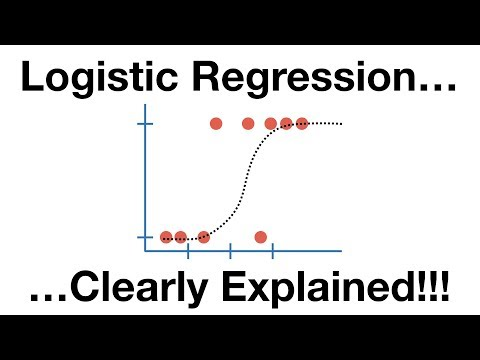

In [28]:
# Video: Quick intro to Logistic Regression (Classification ML Model)
from IPython.display import YouTubeVideo
YouTubeVideo('yIYKR4sgzI8') # ~ 8 minutes

In [29]:
# import required libraries 
# for modelling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random

# for visualisation
import matplotlib.pyplot as plt 
%matplotlib inline

### 2.1 Define Model Inputs (X) & Output (y)

In [30]:
df.head(5)

Age  Age_Raw  Embarked  FamilySize  Fare  Fare_Raw  Gender  IsAlone  \
0    1       22         0           2     0    7.2500       1        0   
1    2       38         1           2     3   71.2833       0        0   
2    1       26         0           1     1    7.9250       0        1   
3    2       35         0           2     3   53.1000       0        0   
4    2       35         0           1     1    8.0500       1        1   

                                                Name  Parch  Pclass  SibSp  \
0                            Braund, Mr. Owen Harris      0       3      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0       1      1   
2                             Heikkinen, Miss. Laina      0       3      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0       1      1   
4                           Allen, Mr. William Henry      0       3      0   

   Survived            Ticket  
0         0         A/5 21171  
1         1          PC 17599  
2         1  STON/O2. 3101282  
3         1            113803  
4         0            373450

In [31]:
dfy = df.Survived # model output
dfX = df.drop(['Age_Raw','Fare_Raw','Name', 'Ticket', 'Survived'], axis=1) # Model Inputs
dfX.head()

Age  Embarked  FamilySize  Fare  Gender  IsAlone  Parch  Pclass  SibSp
0    1         0           2     0       1        0      0       3      1
1    2         1           2     3       0        0      0       1      1
2    1         0           1     1       0        1      0       3      0
3    2         0           2     3       0        0      0       1      1
4    2         0           1     1       1        1      0       3      0

In [32]:
# Convert dfX & dfy (Pandas Dataframes) to X & y (Numpy Arrays) for modelling purpose
X = dfX.values
y = dfy.values

In [33]:
# Split both Inputs (X) and Output (y) into training set (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Random state ensure consistent random samples are selected

### 2.1 Train a Base Model

In [34]:
# Train a base Logistic Regression Model "lg"
lg = LogisticRegression(random_state=2, # set the random state to obtain the same results every time
                        solver='lbfgs', # common optimization algorithm used for logistic regression
                        max_iter=100 # to make sure the model will converge
                       ) 
# Fit the model to the training set
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Calculate the training accuracy
train_acc = lg.score(X_train, y_train)
print("Training Accuracy: %.2f%%" % (train_acc*100))

Training Accuracy: 81.04%


In [36]:
# Calculated the fitted values for training set
y_fitted = lg.predict(X_train) # returns 0 or 1
y_fitted

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

## 3. Fine Tune Hyperparameters of Model <a id='p3' />

For most models, the `GridSearchCV` package could be used to automatically determine the optimal hyperparameters of the "best" model.

In [37]:
# Determine hyperparameters to auto tune
pipe = Pipeline([('classifier', LogisticRegression(C=1e8))])
param_grid = {  'classifier__penalty' : ['l2'],
                'classifier__max_iter' : [10,100,1000],
                'classifier__solver' : ['lbfgs'] }

In [38]:
# Train a second Logistic Regression Model "lg2" with "best" hyperparameters
lg2 = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

In [39]:
lg2.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished
C:\Users\lji6\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        LogisticRegression(C=100000000.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                 

In [40]:
# Calculate the training accuracy of lg2
train_acc2 = lg2.score(X_train, y_train)
print("Training Accuracy: %.2f%%" % (train_acc2*100.0))

Training Accuracy: 80.90%


Notice that the training accuracy did not improve. This is because a Logistic Regression model does not have any suitable hyperparameters to be tuned. To fine tune the model, we need to utilize the `statsmodel` package to find out the p-value for each coefficient so as to understand our confidence levels on the coefficient of each feature.

In [41]:
# We will now train a Logistic Regression model using the statsmodel package
# Add a constant to the X_train dataset and rename is as X_train_sm
X_train_sm = sm.add_constant(X_train)

In [42]:
# Create another model using statsmodel's Logit method for model fitting
lg3 = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.419424
         Iterations 13


In [43]:
# Print out the Model Summary
lg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.3632
Time:                        16:09:04   Log-Likelihood:                -298.63
converged:                       True   LL-Null:                       -468.94
Covariance Type:            nonrobust   LLR p-value:                 9.072e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8872   2.28e+06   1.71e-06      1.000   -4.46e+06    4.46e+06
x1            -0.6961      0.149     -4.664      0.000      -0.989      -0.404
x2             0.1591      0.157      1.015      0.310      -0.148       0.467
x3             0.9462   2.28e+06   4.15e-07      1.000   -4.46e+06    4.46e+06
x4             0.2065      0.171      1.209      0.227      -0.128       0.541
x5            -2.7409      0.228    -12.011      0.000      -3.188      -2.294
x6            -1.0295      0.342     -3.012      0.003      -1.699      -0.360
x7            -1.2290   2.28e+06   -5.4e-07      1.000   -4.46e+06    4.46e+06
x8            -0.9602      0.195     -4.914      0.000      -1.343      -0.577
x9            -1.7120   2.28e+06  -7.52e-07      1.000   -4.46e+06    4.46e+06
==============================================================================
"""

In [44]:
# Recall the column names of df
dfX.columns

Index(['Age', 'Embarked', 'FamilySize', 'Fare', 'Gender', 'IsAlone', 'Parch',
       'Pclass', 'SibSp'],
      dtype='object')

Features with p-value smaller than 0.05 can be recognized as the strong indicators. 

The identified features are: x1, x5, x6 and x8, namely Age, Gender, IsAlone, and Pclass.

In [45]:
# Select only features identified with high p-value by statsmodel
dfX_new = dfX[['Age','Gender','IsAlone','Pclass']]

In [46]:
# Repeat training process with reduced features
X_new = dfX_new.values
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=2)
lg_new = LogisticRegression(random_state=2, solver='lbfgs', max_iter=100) 
lg_new.fit(X_train_new, y_train_new)
train_acc_new= lg_new.score(X_train_new, y_train_new)
print("Training Accuracy: %.2f%%" % (train_acc_new*100.0))

Training Accuracy: 80.06%


## 4. Evaluate a Machine Learning Model <a id='p4' />
### 4.1 Holdout Validation Approach - Train and Test Set Split

In [47]:
# Calculate the testing accuracy of lg - Base
test_acc = lg.score(X_test, y_test)
print("Testing Accuracy: %.2f%%" % (test_acc*100.0))

Testing Accuracy: 75.42%


In [48]:
# Calculate the testing accuracy of lg2 - GridSearchCV
test_acc2 = lg2.score(X_test, y_test)
print("Testing Accuracy: %.2f%%" % (test_acc2*100.0))

Testing Accuracy: 75.98%


In [49]:
# Calculate the testing accuracy of lg_new - With reduced features
test_acc_new = lg_new.score(X_test_new, y_test_new)
print("Testing Accuracy: %.2f%%" % (test_acc_new*100.0))

Testing Accuracy: 77.09%


Let's plot a side-by-side bar chart to compare the performance of the models.

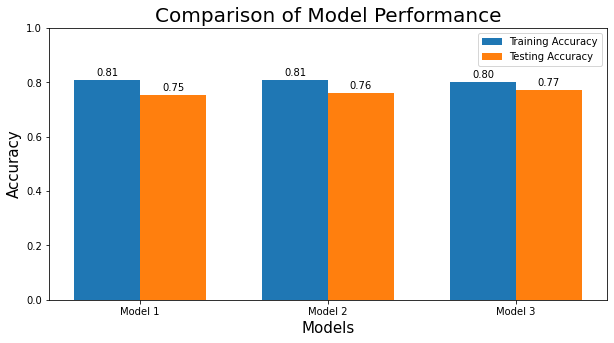

In [50]:
# Define x-axis and y-axis data values
x_labels = ['Model 1', 'Model 2', 'Model 3']
x_axis_train = [train_acc, train_acc2, train_acc_new]
x_axis_test = [test_acc, test_acc2, test_acc_new]

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.35

plt.figure(figsize=(10,5))

# Plot side-by-side bars
bar1 = plt.bar(x - width/2, x_axis_train, width, label='Training Accuracy')
bar2 = plt.bar(x + width/2, x_axis_test, width, label='Testing Accuracy')

# Customise the plot
plt.title('Comparison of Model Performance', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Models', fontsize = 15)
plt.xticks(x, x_labels)
plt.ylim(bottom = 0, top = 1.0)
plt.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        acc = each.get_height()
        plt.annotate('{:.2f}'.format(acc),
                    xy=(each.get_x() + each.get_width() / 2, acc),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# Use the autolabel function to display data label for each bar       
autolabel(bar1)
autolabel(bar2)

As we can see, Model 3 (lg_new) - the model with the reduced features, yielded the best testing accuracy of 77.09%, making it our best model in this simple exercise. The smallest difference between the training and testing accuracies also suggests that this model is overfitted to training data the least.

### 4.2 K-fold Cross Validation

In [51]:
# Determine the number of folds
kfold = model_selection.KFold(n_splits=10, random_state=100)

# Set the model to be trained using k-fold cross validation
lg4 = LogisticRegression(random_state=2, solver='lbfgs', max_iter=100)

# Perform k-fold cross validation and store the list of accuracies
train_acc_list = model_selection.cross_val_score(lg4, X_train, y_train, cv=kfold)

# Display the average accuracy
print("Average Accuracy: %.2f%%" % (train_acc_list.mean()*100.0))

Average Accuracy: 80.32%


### 4.3 Confusion Matrix

In [52]:
# Use the best model to perform prediction on test data
y_pred = lg_new.predict(X_test_new) # returns 0 or 1

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test_new, y_pred)
cnf_matrix

array([[87, 13],
       [28, 51]], dtype=int64)

In [53]:
# Various scores based on model with highest testing accuracy
print("Accuracy: %.2f" % metrics.accuracy_score(y_test_new, y_pred))
print("Precision: %.2f" % metrics.precision_score(y_test_new, y_pred))
print("Recall: %.2f" % metrics.recall_score(y_test_new, y_pred))
print("F1 score: %.2f" % metrics.f1_score(y_test_new, y_pred))

Accuracy: 0.77
Precision: 0.80
Recall: 0.65
F1 score: 0.71


## 5. Save a Trained Model for Future Use <a id='p5' />
### 5.1 Use `joblib` package to save trained models

In [54]:
# import required library to save trained models
import joblib

In [55]:
# Name the file (in pickle format)
file = "my_lg_model.pkl" 

# Save the parameters of the trained model in the file
joblib.dump(lg_new, file)

['my_lg_model.pkl']

### 5.2 Load Trained Models

In [56]:
# Load model from pickle file
lg_loaded = joblib.load(file)
lg_loaded

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Use the model to perform scoring using test data
lg_loaded.score(X_test_new, y_test_new)

0.770949720670391